In [23]:
import subprocess
import sys

# pip 업데이트
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])

0

In [24]:
subprocess.check_call([sys.executable, "-m", "pip", "install", "pyreadstat"])

0

In [25]:
#! pip install pyreadstat

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
# 데이터 불러오기
raw_welfare = pd.read_spss('D:/data/Koweps_hpda18_2023_beta1.sav')

# 복사
welfare = raw_welfare.copy()


In [36]:
# 데이터 검토
# welfare            # 앞부분, 뒤부분 확인 
# welfare.shape      # 행/열의 개수 
# welfare.info()     # 열의 속성 
welfare.describe() # 요약통계

,h18_id,h18_ind,h18_sn,h18_merkey,h_new,h_new1,h18_cobf,p18_wsc,p18_wsl,p18_wgc,...,da18_324,da18_325,da18_326,da18_327,da18_6aq14,h18_pers_income1,h18_pers_income2,h18_pers_income3,h18_pers_income4,h18_pers_income5
count,15931.000000,15931.000000,15931.000000,1.593100e+04,15931.000000,15931.000000,130.000000,9775.000000,9775.000000,9775.000000,...,290.000000,955.000000,955.000000,791.000000,895.000000,2897.000000,4104.000000,1114.000000,15931.000000,914.000000
mean,6138.267591,6.927500,1.005147,6.138337e+07,0.154165,0.232252,2.453846,1.000000,1.000000,5281.648798,...,2.520690,7.431414,3.643979,1.271808,1.144134,4795.637211,1595.026316,3613.086176,3.498839,1293.448578
std,3640.121959,6.716206,0.138954,3.640171e+07,0.361118,0.422282,1.800566,0.671061,0.722643,3544.310475,...,1.352143,9.271598,0.768178,0.445173,0.351422,3049.613417,1667.525331,3922.906442,49.643006,1996.625847
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,0.000000,1.000000,0.009111,0.000000,48.118689,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-3640.000000,0.000000,-4702.000000
25%,2998.000000,1.000000,1.000000,2.998080e+07,0.000000,0.000000,1.000000,0.479451,0.446551,2532.294145,...,2.000000,2.000000,4.000000,1.000000,1.000000,2956.000000,300.000000,1200.000000,0.000000,247.500000
50%,5729.000000,4.000000,1.000000,5.729010e+07,0.000000,0.000000,2.000000,0.935209,0.865471,4939.443317,...,2.000000,5.000000,4.000000,1.000000,1.000000,4020.000000,1092.000000,2627.000000,0.000000,581.000000
75%,9592.000000,17.000000,1.000000,9.592070e+07,0.000000,0.000000,2.000000,1.383096,1.379557,7305.027838,...,2.000000,10.000000,4.000000,2.000000,1.000000,6035.000000,2400.000000,4990.000000,0.000000,1483.000000
max,12011.000000,18.000000,9.000000,1.201117e+08,1.000000,1.000000,7.000000,3.936318,3.116706,20790.249178,...,6.000000,168.000000,4.000000,2.000000,2.000000,61110.000000,31224.000000,45800.000000,3000.000000,19118.000000


In [44]:
# 분석에 필요한 열을 결정 // 열 이름 변경 
welfare = welfare.rename(
    columns={'h18_g3' : 'sex',               #성별
             'h18_g4' : 'birth',             #태어난 연도
             'h18_g10' : 'marriage_type',    #혼인상태
             'h18_g11' : 'religion',         #종교
             'p1802_8aq1' : 'income',        #월급
             'h18_eco9' : 'code_job',        #직업코드
             'h18_reg7' : 'code_region'})    #지역코드

print(welfare.columns)

Index(['h18_id', 'h18_ind', 'h18_sn', 'h18_merkey', 'h_new', 'h_new1',
       'h18_cobf', 'p18_wsc', 'p18_wsl', 'p18_wgc',
       ...
       'da18_324', 'da18_325', 'da18_326', 'da18_327', 'da18_6aq14',
       'h18_pers_income1', 'h18_pers_income2', 'h18_pers_income3',
       'h18_pers_income4', 'h18_pers_income5'],
      dtype='object', length=1155)


In [45]:
# 성별 변수 검토 및 전처리 
welfare['sex'].dtype  # 열타입확인 

dtype('float64')

In [46]:
welfare['sex'].value_counts() #빈도수

sex
2.0    8787
1.0    7144
Name: count, dtype: int64

In [47]:
# 이상치 결측 처리 
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측 확인 
welfare['sex'].isna().sum()

np.int64(0)

In [48]:
# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기 
welfare['sex'].value_counts() #빈도수

sex
female    8787
male      7144
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

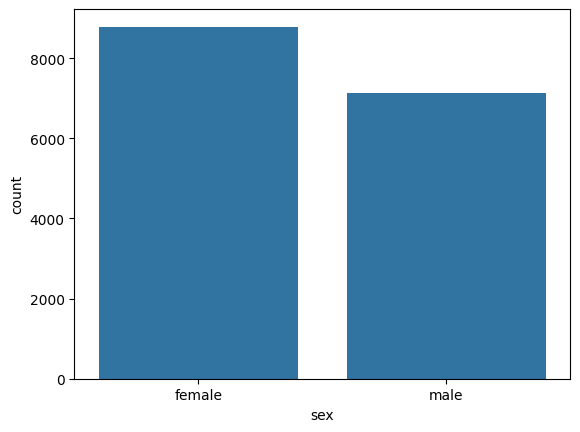

In [49]:
# 빈도 막대 그래프
sns.countplot(data= welfare, x='sex')

In [50]:
welfare['income'].dtype #변수타입 출력 

dtype('float64')

In [51]:
welfare['income'].describe #요약통계

<bound method NDFrame.describe of 0          NaN
1        180.0
2          NaN
3        252.0
4          NaN
         ...  
15926    833.0
15927      NaN
15928      NaN
15929      NaN
15930      NaN
Name: income, Length: 15931, dtype: float64>

<Axes: xlabel='income', ylabel='Count'>

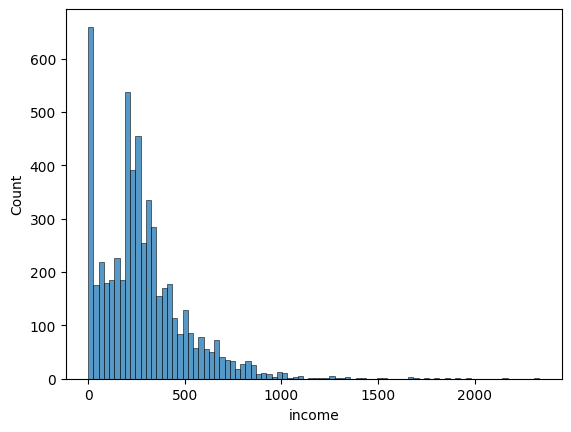

In [52]:
# 시각화
sns.histplot(data=welfare, x='income') # 히스토그램 그래프

In [53]:
welfare['income'].describe() # 이상치 확인_전처리

count    5630.000000
mean      284.461989
std       222.592542
min         0.000000
25%       133.250000
50%       250.000000
75%       375.000000
max      2333.000000
Name: income, dtype: float64

In [54]:
print(welfare['income'].isna().sum()) # 결측치 확인

10301


In [55]:
# 이상치 결측 처리 
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 결측치 확인 
welfare['income'].isna().sum()

np.int64(10301)

In [56]:
# 성별 월급 평균
sex_income = welfare.dropna(subset= ['income']) \
                    .groupby('sex', as_index=False)\
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,200.327693
1,male,373.581565


<Axes: xlabel='sex', ylabel='mean_income'>

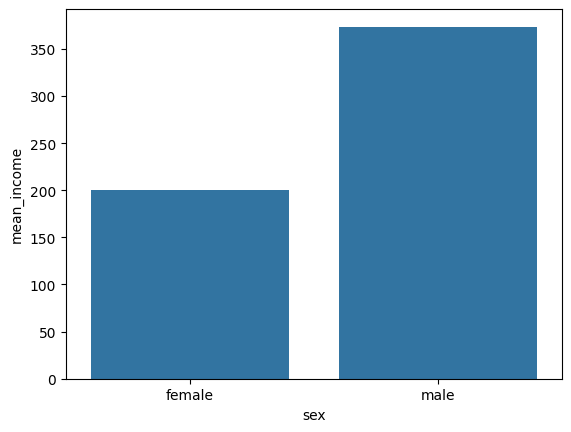

In [57]:
# 막대그래프 - 총량을 나타낼 떄 좋음
sns.barplot(data=sex_income, x='sex',y='mean_income')

In [58]:
welfare['birth'].dtypes

dtype('float64')

In [59]:
welfare['birth'].describe #요약통계

<bound method NDFrame.describe of 0        1945.0
1        1948.0
2        1942.0
3        1962.0
4        1963.0
          ...  
15926    1975.0
15927    1976.0
15928    2009.0
15929    1964.0
15930    1964.0
Name: birth, Length: 15931, dtype: float64>

<Axes: xlabel='birth', ylabel='Count'>

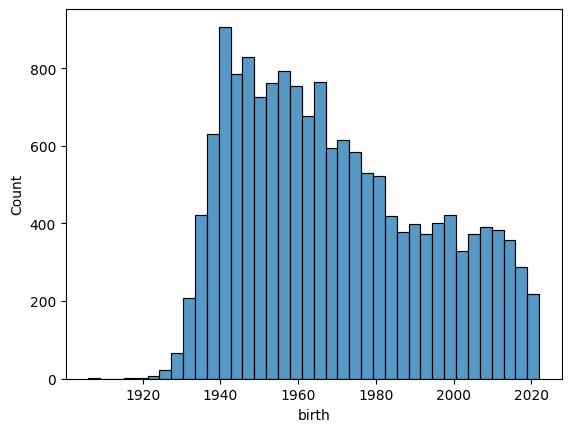

In [60]:
sns.histplot(data=welfare, x='birth') # 히스토그램 그래프

In [61]:
# 전처리 
welfare['birth'].describe()

count    15931.000000
mean      1969.424016
std         24.226765
min       1906.000000
25%       1949.000000
50%       1965.000000
75%       1988.000000
max       2022.000000
Name: birth, dtype: float64

In [62]:
# 결측치 확인
welfare['birth'].isna().sum()

np.int64(0)

In [63]:
# 이사치 결측처리
welfare['birth'] = np.where(welfare['income'] == 9999, np.nan, welfare['birth'])

# 결측치 재확인
welfare['birth'].isna().sum()

np.int64(0)

In [64]:
# 나이열 추가하기
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    15931.000000
mean        50.575984
std         24.226765
min         -2.000000
25%         32.000000
50%         55.000000
75%         71.000000
max        114.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

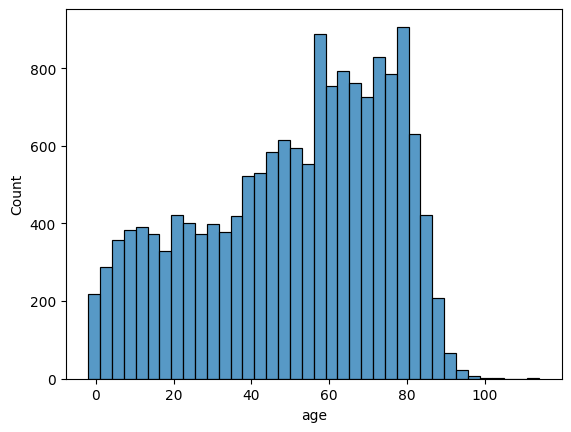

In [65]:
sns.histplot(data=welfare, x='age') # 히스토그램 그래프

### 나이별 월급 평균

In [66]:
# 나이별 월급 평균 
age_income = welfare.dropna(subset=['income']) \
                    .groupby('age') \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
16.0,197.000000
17.0,186.500000
18.0,125.560000
19.0,138.800000
20.0,185.067797


<Axes: xlabel='age', ylabel='mean_income'>

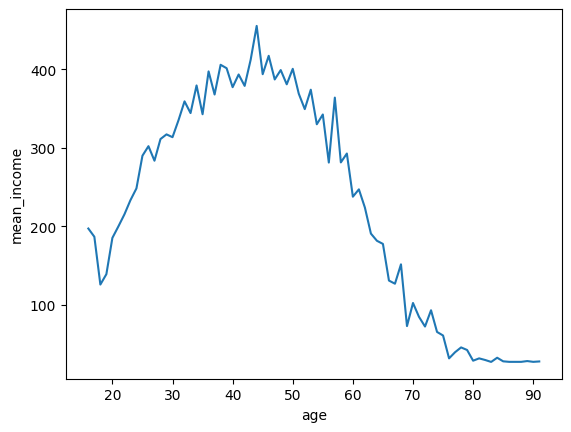

In [67]:
# 선그래프
sns.lineplot(data= age_income, x='age', y='mean_income')

In [68]:
# 연령대에 따른 임금 차이
# 초년층: 30세 미만
# 중년층: 30~599세
# 노년층: 60세 이상 

# 나이 변수 확인
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [69]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle','old' )))

welfare ['ageg'].value_counts()

ageg
old       6914
middle    5339
young     3678
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

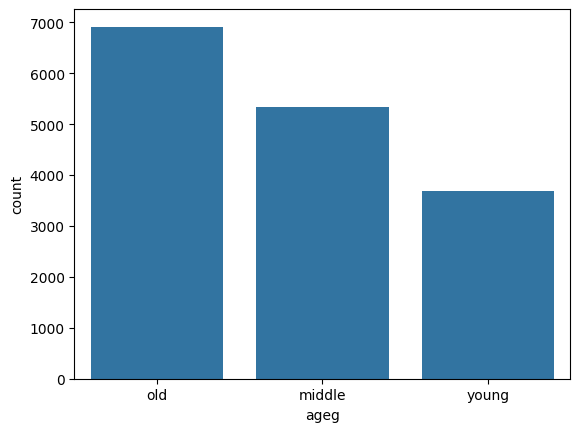

In [70]:
# 빈도그래프
sns. countplot(data = welfare, x = 'ageg')

### 연령대 별 월급차이 

In [71]:
# 연령대 별 월급차이 
# 연령대 별 월급 평균

ageg_income = welfare.dropna(subset=['income']) \
                      .groupby('ageg', as_index= False) \
                      .agg(mean_income = ('income', 'mean'))
age_income

,mean_income
age,
16.0,197.000000
17.0,186.500000
18.0,125.560000
19.0,138.800000
20.0,185.067797
...,...
87.0,27.000000
88.0,27.000000
89.0,28.000000


<Axes: xlabel='ageg', ylabel='mean_income'>

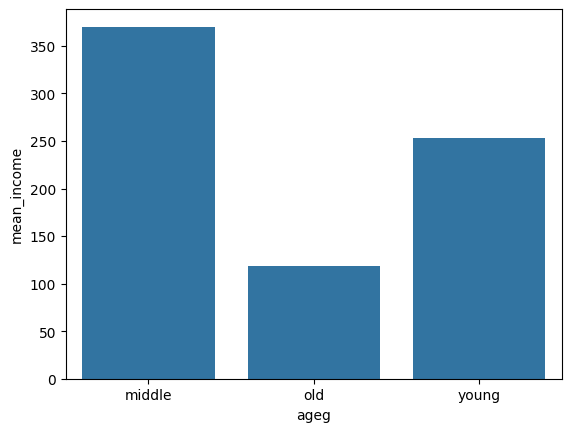

In [72]:
# 시각화
sns.barplot(data= ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

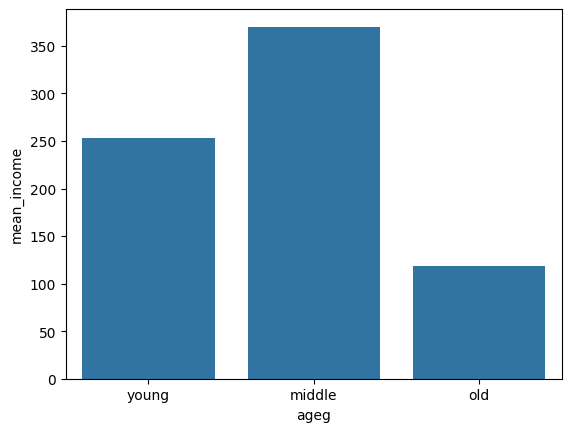

In [73]:
sns.barplot(data= ageg_income, x='ageg', y='mean_income', 
            order= ['young', 'middle', 'old'])

### 연령대 및 성별 월급 차이 

In [74]:
# 연령대 및 성별 평균
sex_income = welfare.dropna(subset=['income']) \
                      .groupby(['ageg','sex'], as_index= False) \
                      .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,265.110274
1,middle,male,457.490330
2,old,female,80.148030
3,old,male,184.325540
4,young,female,237.080483
5,young,male,272.902381


<Axes: xlabel='ageg', ylabel='mean_income'>

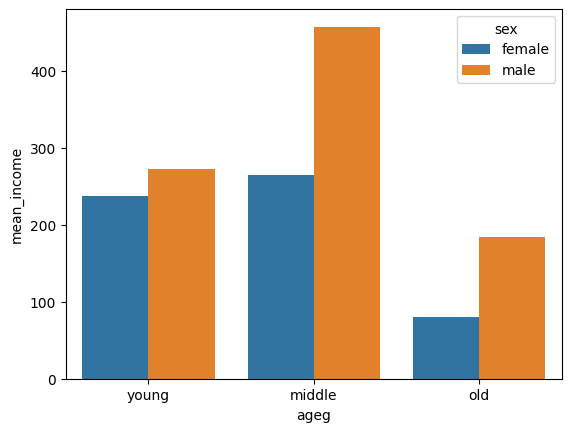

In [75]:
# 연령대 및 성별 월급 시각화
sns.barplot(data= sex_income, x='ageg', y='mean_income', hue='sex',
            order= ['young', 'middle', 'old'])

### 나이 및 성별 평균표 

In [76]:
# 나이 및 성별 평균표 
sex_age = welfare.dropna(subset=['income']) \
                 .groupby(['age', 'sex'], as_index= False) \
                 .agg(mean_income = ('income', 'mean')) 
sex_age.head()

,age,sex,mean_income
0,16.0,male,197.000000
1,17.0,female,197.454545
2,17.0,male,169.285714
3,18.0,female,85.181818
4,18.0,male,157.285714


<Axes: xlabel='age', ylabel='mean_income'>

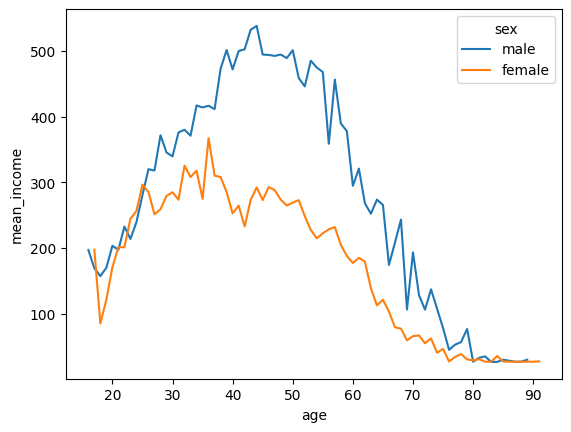

In [77]:
# 성별 평균 급여차이 
sns.lineplot(data= sex_age, x='age', y='mean_income', hue='sex')

### 직업별 월급차이

In [78]:
# 직업 코드 열 속성 
welfare['code_job'].dtype 

dtype('float64')

In [79]:
# 빈도수 
welfare['code_job'].value_counts()

code_job
611.0    1195
941.0     670
521.0     384
312.0     310
999.0     273
         ... 
212.0       1
861.0       1
822.0       1
872.0       1
423.0       1
Name: count, Length: 153, dtype: int64

In [83]:
# 직업 코드의 직종_엑셀시트 지정하기
list_job = pd.read_excel('D:/data/Koweps_Codebook_2023.xlsx',
                         sheet_name='직종코드')

list_job

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [84]:
list_job.shape # 직업군 종류

(156, 2)

In [85]:
# welfare에 list_job 결합하기 
welfare = welfare.merge(list_job, how='left', on= 'code_job')

In [86]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
1,942.0,건물 관리원 및 검표원
2,952.0,음식 관련 단순 종사자
3,855.0,금속기계 부품 조립원
8,941.0,청소원 및 환경미화원
9,151.0,판매 및 운송 관리자


In [87]:
# 직업별 월급 
# 1) job, income 결측치 제거
# 2) job 분류 
# 3) income 평균 

job_income = welfare.dropna(subset=['job', 'income']) \
                    .groupby('job', as_index= False) \
                    .agg(mean_income= ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,90.926471
1,간호사,317.101449
2,감정∙기술영업및중개관련종사자,387.250000
3,건물 관리원 및 검표원,206.913043
4,건설 및 광업 단순 종사자,289.859649


In [88]:
# 상위 10위 추출 
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
97,의료 진료 전문가,800.833333
101,인사 및 경영 전문가,760.333333
147,화학공학 기술자 및 시험원,729.200000
132,컴퓨터 하드웨어 및 통신공학 전문가,725.800000
128,철도운송 관련 종사자,698.000000
59,법률 전문가,695.000000
26,기업 고위 임원,691.666667
142,행정 및 경영 지원 관리자,690.000000
109,장교,687.750000
62,보험 및 금융 관리자,681.200000


In [89]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : "Malgun Gothic"})

<Axes: xlabel='mean_income', ylabel='job'>

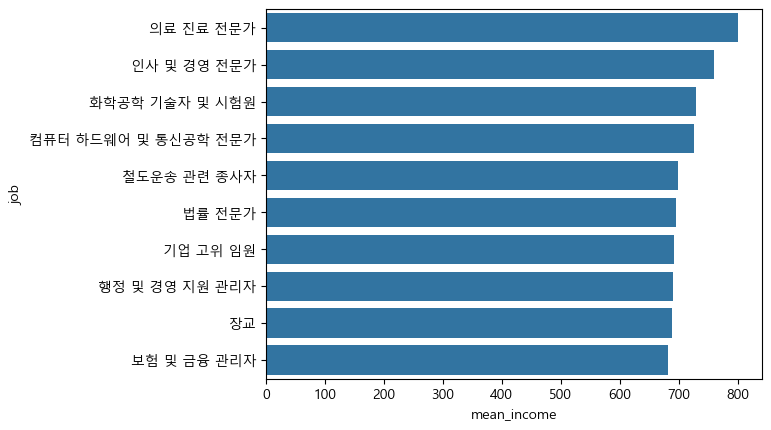

In [90]:
# 위의 데이터 내용을 시각화
sns.barplot(data=top10, y='job', x='mean_income')

In [91]:
# 하위 10위 추출 
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
129,청소원 및 환경미화원,76.252322
33,기타 서비스 관련 단순 종사자,77.402439
0,가사 및 육아 도우미,90.926471
32,기타 돌봄∙보건 및 개인 생활 서비스 종사자,109.212121
96,음식 관련 단순 종사자,115.238806
42,돌봄 및 보건 서비스 종사자,141.383929
148,환경∙청소 및 경비 관련 관리자,149.861111
38,농림∙어업 관련 단순 종사자,151.368421
140,학예사∙사서 및 기록물 관리사,168.000000
78,식음료 서비스 종사자,171.240000


[(0.0, 800.0)]

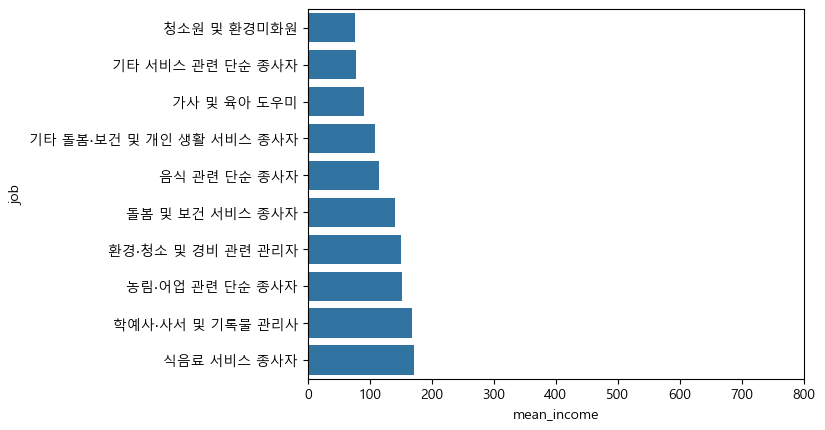

In [92]:
sns.barplot(data=bottom10, y='job', x='mean_income').set(xlim=(0,800))

### 성별 직업 빈도 

In [93]:
# 남성 직업 빈도 상위 10개 추출 
job_male = welfare.dropna(subset=['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index=False) \
                  .agg(n= ('job', 'count')) \
                  .sort_values('n', ascending= False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,617
104,자동차 운전원,229
11,경영 관련 사무원,218
128,청소원 및 환경미화원,172
45,매장 판매 종사자,156
88,영업 종사자,107
33,기타 서비스 관련 단순 종사자,105
120,제조 관련 단순 종사자,102
4,건설 및 광업 단순 종사자,100
3,건물 관리원 및 검표원,95


In [94]:
# 여성 직업 빈도 상위 10개 추출 
job_female = welfare.dropna(subset=['job']) \
                  .query('sex == "female"') \
                  .groupby('job', as_index=False) \
                  .agg(n= ('job', 'count')) \
                  .sort_values('n', ascending= False) \
                  .head(10)
job_female

,job,n
86,작물 재배 종사자,578
96,청소원 및 환경미화원,498
35,매장 판매 종사자,228
32,돌봄 및 보건 서비스 종사자,216
114,회계 및 경리 사무원,175
25,기타 서비스 관련 단순 종사자,168
61,식음료 서비스 종사자,152
76,음식 관련 단순 종사자,132
92,제조 관련 단순 종사자,123
93,조리사,120


[(0.0, 500.0)]

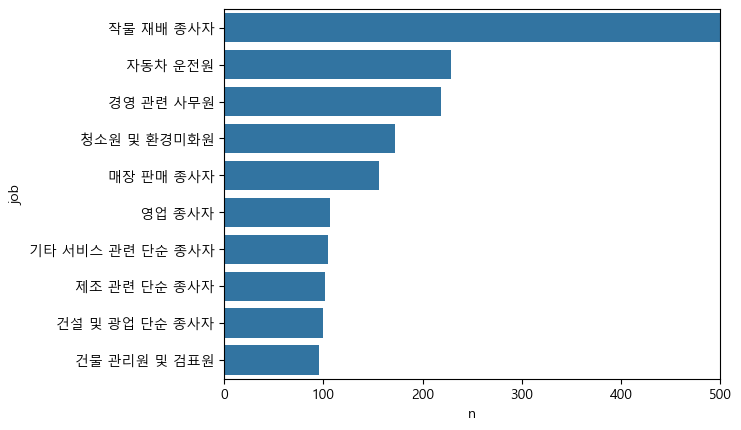

In [95]:
# 남성 직업 빈도 막대그래프
sns.barplot(data= job_male, y='job', x='n').set(xlim=(0,500))

[(0.0, 500.0)]

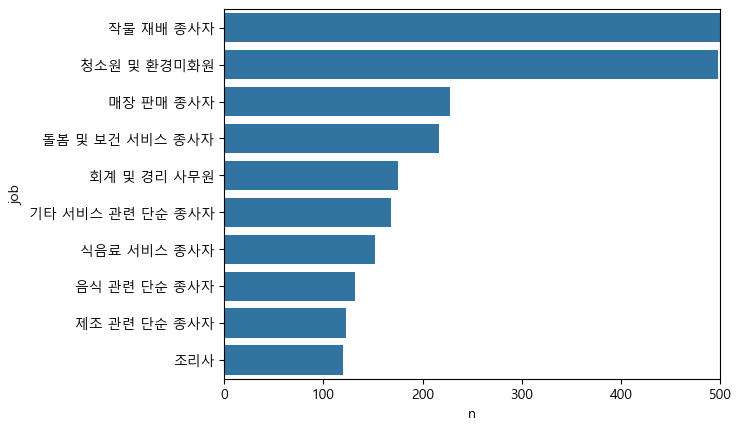

In [96]:
# 여성 직업 빈도 막대그래프
sns.barplot(data= job_female, y='job', x='n').set(xlim=(0,500))

### 종교 유무에 따른 이혼율

In [97]:
welfare['religion'].dtype

dtype('float64')

In [98]:
welfare['religion'].value_counts() #빈도수

religion
2.0    8996
1.0    6935
Name: count, dtype: int64

In [99]:
# 전처리 - 1 : 있음, 2 : 없음, 9: 모름/무응답 
# 종교 유무 이름 부여 
welfare['religion'] = np.where(welfare['religion'] == 1, 'Yes', 'No')

# 빈도구하기
welfare['religion'] .value_counts()

religion
No     8996
Yes    6935
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

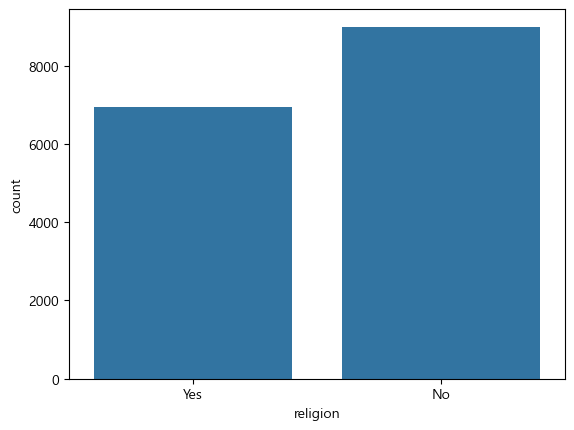

In [100]:
# 시각화
sns.countplot(data=welfare, x='religion')

In [101]:
# 혼인 상태 여부
welfare['marriage_type'].dtype

dtype('float64')

In [102]:
# 항목별 빈도수
welfare['marriage_type'].value_counts()

marriage_type
1.0    8107
5.0    2589
2.0    2364
0.0    1883
3.0     872
4.0      92
6.0      24
Name: count, dtype: int64

In [103]:
# 이혼여부 
# 0.비해당(18세 미만) 1.유배우  2.사별  3.이혼   4.별거 
# 5.미혼(18세이상, 미혼모 포함)   6.기타(사망 등)
# => 1 : marriage, 3: divorce, - 그외: etc 

welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage', 
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [104]:
# 이혼 여부 별 빈도
n_divorce = welfare.groupby('marriage', as_index=False) \
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,872
1,etc,6952
2,marriage,8107


<Axes: xlabel='marriage', ylabel='n'>

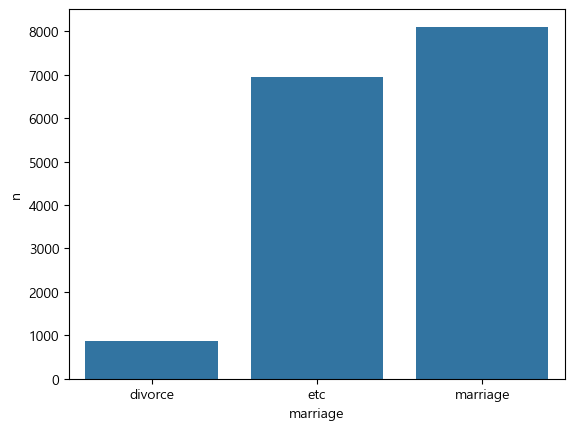

In [105]:
sns.barplot(data= n_divorce, x= 'marriage', y= 'n')

In [106]:
# 종교 유무에 따른 이혼율 분석 
# etc 제외 
# religion별 분리 
# marriage 추출 
# 비율 구하기 
rel_dev = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index=False) \
                 ['marriage'] \
                 .value_counts( normalize=True )

rel_dev

,religion,marriage,proportion
0,No,marriage,0.900703
1,No,divorce,0.099297
2,Yes,marriage,0.905428
3,Yes,divorce,0.094572


In [107]:
# 전처리 
# divorce 추출 
# 이혼에 해당하는 값만 추출 후 proportion을 백분율로 바꾸고 
# 소수점 첫째자리까지 반올림 

rel_dev = rel_dev.query('marriage == "divorce"') \
                 .assign(proportion = rel_dev['proportion'] * 100) \
                 .round(1)
rel_dev

,religion,marriage,proportion
1,No,divorce,9.9
3,Yes,divorce,9.5


<Axes: xlabel='religion', ylabel='proportion'>

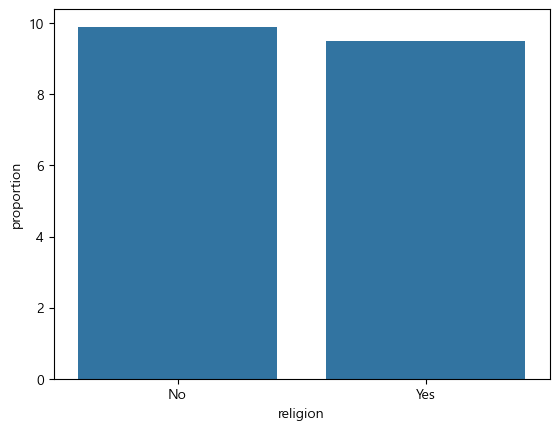

In [108]:
sns.barplot(data= rel_dev, x= 'religion', y= 'proportion')

### 연령대 및 종교 유무에 따른 이혼율 분석

In [109]:
# etc 제외
# ageg별 분리
# marriage 추출
# 비율 구하기 

age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index=False) \
                 ['marriage'] \
                 .value_counts(normalize= True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.901045
1,middle,divorce,0.098955
2,old,marriage,0.902048
3,old,divorce,0.097952
4,young,marriage,0.967033
5,young,divorce,0.032967


In [110]:
# 연령대 및 이혼 여부별 빈도 
welfare.query('marriage != "etc"') \
       .groupby('ageg', as_index=False) \
       ['marriage'] \
       .value_counts()

,ageg,marriage,count
0,middle,marriage,3879
1,middle,divorce,426
2,old,marriage,4052
3,old,divorce,440
4,young,marriage,176
5,young,divorce,6


In [111]:
# 연령대별 이혼율 그래프
# 초년 제외, 이혼 추출 
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.9
3,old,divorce,9.8


<Axes: xlabel='ageg', ylabel='proportion'>

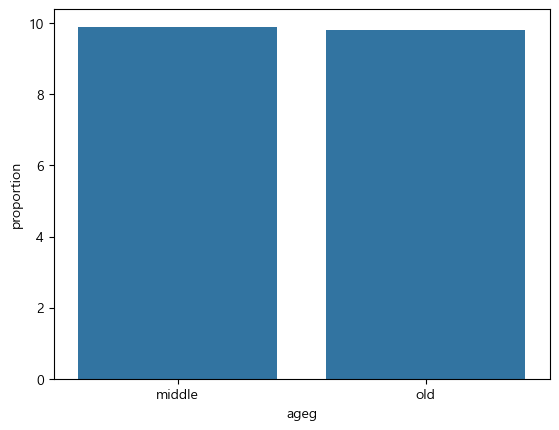

In [112]:
# 막대 그래프
sns.barplot(data= age_div, x= "ageg", y= 'proportion')

### 지역별 연령대 비율

In [113]:
# 전처리
welfare['code_region'].dtypes

dtype('float64')

In [114]:
welfare['code_region'].value_counts() #지역코드 빈도수

code_region
2.0    3524
7.0    2875
3.0    2743
4.0    1895
1.0    1849
5.0    1688
6.0    1357
Name: count, dtype: int64

In [115]:
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region' : ['서울',
                                        '수도권(인천/경기)',
                                        '부산/경남/울산',
                                        '대구/경북',
                                        '대전/충남',
                                        '강원/충북',
                                        '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [116]:
# 지역명 필드 추가 
welfare = welfare.merge(list_region, how='left', on='code_region')

In [117]:
welfare[['code_region', 'region']].head(10)

,code_region,region
0,1.0,서울
1,4.0,대구/경북
2,1.0,서울
3,1.0,서울
4,1.0,서울
5,1.0,서울
6,1.0,서울
7,1.0,서울
8,2.0,수도권(인천/경기)
9,1.0,서울


In [118]:
# 지역별 연령대 비율표
# 1. region 별 분류 
# 2. ageg 추출 
# 3. 비율 구하기 

region_ageg = welfare.groupby('region', as_index= False) \
                        ['ageg'] \
                        .value_counts(normalize=True)
region_ageg


,region,ageg,proportion
0,강원/충북,old,0.509211
1,강원/충북,middle,0.300663
2,강원/충북,young,0.190125
3,광주/전남/전북/제주도,old,0.484522
4,광주/전남/전북/제주도,middle,0.301913
5,광주/전남/전북/제주도,young,0.213565
6,대구/경북,old,0.518206
7,대구/경북,middle,0.304485
8,대구/경북,young,0.177309
9,대전/충남,old,0.457938


<Axes: xlabel='proportion', ylabel='region'>

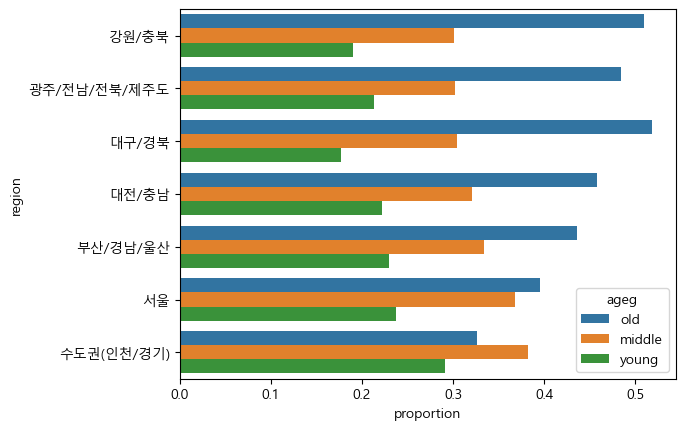

In [119]:
# 시각화
sns.barplot(data= region_ageg, y='region', x='proportion', hue = 'ageg')

In [120]:
# 지역끼리 비교하기 쉽도록 연령대별 막대를 누적한 '누적 비율 막대 그래프 생성'

# 피벗 : 행과 열을 회전해 표의 구성을 바꾸는 작업 
pivot_df = \
    region_ageg[['region','ageg','proportion']].pivot(index = 'region', 
                                                      columns = 'ageg', 
                                                      values = 'proportion')

pivot_df

ageg,middle,old,young
region,,,
강원/충북,0.300663,0.509211,0.190125
광주/전남/전북/제주도,0.301913,0.484522,0.213565
대구/경북,0.304485,0.518206,0.177309
대전/충남,0.320498,0.457938,0.221564
부산/경남/울산,0.334306,0.435654,0.230040
서울,0.367766,0.395349,0.236885
수도권(인천/경기),0.382520,0.326050,0.291430


<Axes: ylabel='region'>

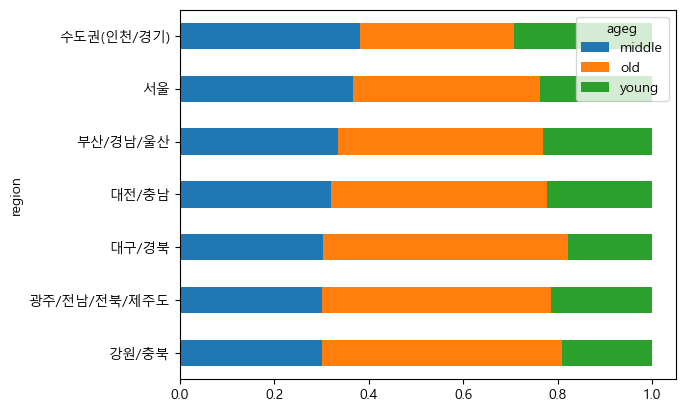

In [121]:
# 가로 막대 회전 시각화 
pivot_df.plot.barh(stacked = True)

In [122]:
# 막대 정렬
# 노년층 기준 정렬, 변수 순서 바꾸기 

reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df 

ageg,young,middle,old
region,,,
수도권(인천/경기),0.291430,0.382520,0.326050
서울,0.236885,0.367766,0.395349
부산/경남/울산,0.230040,0.334306,0.435654
대전/충남,0.221564,0.320498,0.457938
광주/전남/전북/제주도,0.213565,0.301913,0.484522
강원/충북,0.190125,0.300663,0.509211
대구/경북,0.177309,0.304485,0.518206


<Axes: ylabel='region'>

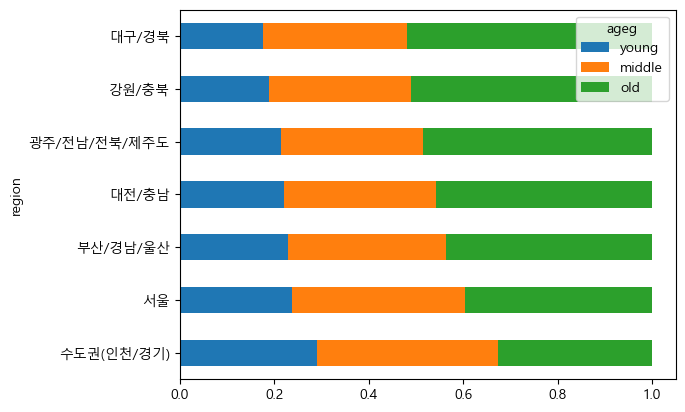

In [123]:
# 누적 가로 막대 회전 시각화 
reorder_df.plot.barh(stacked = True)